In [1]:
# task 1: list all the files in directory
# task 2: process all the files sequentially
# task 3: extract text from each file
# task 4: tokenize
# task 5: iterate over list of words and count unigrams,bigrams,trigrams and quadgrams 
# task 6: return a dictionary of unigrams,bigrams,trigrams and quadgrams

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import os
from PyPDF2 import PdfReader
from scipy.spatial import distance
from pathlib import Path
import json


In [3]:
pdf_path = os.path.join(os.getcwd(), "batchspdf")
pdfs = [pdf for pdf in os.listdir(pdf_path) if pdf.endswith(".pdf")]

stopwords = nltk.corpus.stopwords.words('english')

file_path = os.path.join(os.getcwd(), "words_blacklist.txt")
try:
    with open(file_path, 'r') as file:
        unigram_blacklist = {w.strip().lower() for w in file.readlines() if w.strip()}
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")


Error: The file 'c:\MACHINE LEARNING LAB\words_blacklist.txt' was not found.


In [4]:

# ****** N-GRAM EXTRACTION ****** 
def extract_grams(text):
    
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens if t.isalpha()]   
    try:
        if unigram_blacklist:
            tokens = [t for t in tokens if t not in unigram_blacklist]
    except NameError:
        print(''' "words_blacklist" Variable not defined ''')

    dict_uni, dict_bi, dict_tri, dict_quad = {}, {}, {}, {}
    if len(tokens) < 4:
        return {}
    for i in range(len(tokens)-3):
        dict_uni[tokens[i]] = dict_uni.get(tokens[i],0) + 1
        dict_bi[tokens[i]+" "+tokens[i+1]] = dict_bi.get(tokens[i]+" "+tokens[i+1],0) + 1
        dict_tri[tokens[i]+" "+tokens[i+1]+" "+tokens[i+2]] = dict_tri.get(tokens[i]+" "+tokens[i+1]+" "+tokens[i+2],0) + 1
        dict_quad[tokens[i]+" "+tokens[i+1]+" "+tokens[i+2]+" "+tokens[i+3]] = dict_quad.get(tokens[i]+" "+tokens[i+1]+" "+tokens[i+2]+" "+tokens[i+3],0) + 1

    # handle last tokens
    for i in range(len(tokens)-3, len(tokens)):
        dict_uni[tokens[i]] = dict_uni.get(tokens[i],0) + 1
    for i in range(len(tokens)-3, len(tokens)-1):
        bigram = tokens[i]+" "+tokens[i+1]
        dict_bi[bigram] = dict_bi.get(bigram,0)+1
    trigram = tokens[-3]+" "+tokens[-2]+" "+tokens[-1]
    dict_tri[trigram] = dict_tri.get(trigram,0)+1

    return {1: dict_uni, 2: dict_bi, 3: dict_tri, 4: dict_quad}



In [5]:
def read_pdfs(filename):
    current_file = os.path.join(pdf_path, filename)
    text = ""

    print(f"➡️ Reading: {current_file}")

    # If it's not a valid PDF file, return empty 1–4 gram dicts
    if not os.path.isfile(current_file) or not filename.lower().endswith(".pdf"):
        print(f"⚠️ Skipping {filename} (not a valid PDF file)")
        return {1:{}, 2:{}, 3:{}, 4:{}}

    try:
        with open(current_file, "rb") as pdf_file:
            reader = PdfReader(pdf_file)
            for page in reader.pages:
                try:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text.lower()
                except Exception as e:
                    print(f"⚠️ Error reading page in {filename}: {e}")
    except Exception as e:
        print(f"⚠️ Error opening {filename}: {e}")
        return {1:{}, 2:{}, 3:{}, 4:{}}

    # Even if no text was extracted, return proper structure
    if not text.strip():
        print(f"⚠️ No readable text found in {filename}")
        return {1:{}, 2:{}, 3:{}, 4:{}}

    grams = extract_grams(text)
    # Safety net: ensure all 4 n-gram levels exist
    for i in range(1, 5):
        if i not in grams:
            grams[i] = {}
    return grams


In [6]:

# ****** STATISTICAL FUNCTIONS ****** 
def univariate_analysis(series):
    mean_val = np.mean(series)
    std_val = np.std(series)
    z_scores = [(x-mean_val)/std_val for x in series]
    
    q1, q3 = np.percentile(series, [25,75])
    iqr = q3-q1
    iqr_min = q1 - 1.5*iqr
    iqr_max = q3 + 1.5*iqr
    
    median = np.median(series)
    mad = np.median(abs(series - median))
    
    return z_scores, iqr_min, iqr_max, mad


In [7]:

def mahalanobis_dist(data):
    mean_vec = np.mean(data, axis=0)
    cov_matrix = np.cov(data.T)
    inv_cov_matrix = np.linalg.pinv(cov_matrix)  # safer
    return [distance.mahalanobis(x, mean_vec, inv_cov_matrix) for x in data]


In [8]:

def iqr_method(series):
    q1, q3 = np.percentile(series, [25,75])
    iqr = q3-q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr


In [9]:

# ****** MAIN EXECUTION ****** 
global_map = {1:{},2:{},3:{},4:{}}
doc_count_map = {1:{},2:{},3:{},4:{}}

for pdf in pdfs:
    ngram_counts = read_pdfs(pdf)
    for n in range(1,5):
        for gram, count in ngram_counts[n].items():
            global_map[n][gram] = global_map[n].get(gram,0) + count
            doc_count_map[n][gram] = doc_count_map[n].get(gram,0) + 1


➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\1.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\10-kmeans_v2.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\10.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\11.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\11LinearModeling.ipynb - Colaboratory.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\12.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\1557635784_E11090-e-tarjome.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\186_hypergeom_17-handout.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\2.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\235968.233324.pdf


Multiple definitions in dictionary at byte 0x33cd for key /ExtGState
Multiple definitions in dictionary at byte 0x71c8 for key /ExtGState
Multiple definitions in dictionary at byte 0x9d63 for key /ExtGState
Multiple definitions in dictionary at byte 0xd5c3 for key /ExtGState
Multiple definitions in dictionary at byte 0x10333 for key /ExtGState
Multiple definitions in dictionary at byte 0x130e3 for key /ExtGState


 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\6.pdf


Multiple definitions in dictionary at byte 0x15f08 for key /ExtGState
Multiple definitions in dictionary at byte 0x18d65 for key /ExtGState
Multiple definitions in dictionary at byte 0x1bbd5 for key /ExtGState
Multiple definitions in dictionary at byte 0x27479 for key /ExtGState
Multiple definitions in dictionary at byte 0x2bd7a for key /ExtGState
Multiple definitions in dictionary at byte 0x2ead0 for key /ExtGState
Multiple definitions in dictionary at byte 0x3158f for key /ExtGState
Multiple definitions in dictionary at byte 0x340ca for key /ExtGState
Multiple definitions in dictionary at byte 0x36c86 for key /ExtGState
Multiple definitions in dictionary at byte 0x39860 for key /ExtGState
Multiple definitions in dictionary at byte 0x3c4b1 for key /ExtGState
Multiple definitions in dictionary at byte 0x3f128 for key /ExtGState
Multiple definitions in dictionary at byte 0x42083 for key /ExtGState
Multiple definitions in dictionary at byte 0x44e2b for key /ExtGState
Multiple definitions

 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\622548169.pdf
⚠️ No readable text found in 622548169.pdf
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\68868.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\6_2021_03_28!12_29_36_AM.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\7-1-62-125.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\7.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\8.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\9.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\article8.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\bnp_1.pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\bnp_10.pdf
 "words_

incorrect startxref pointer(1)


 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf2.pdf
⚠️ No readable text found in pdf2.pdf
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf3 (1).pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf3.pdf
⚠️ No readable text found in pdf3.pdf
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf4 (1).pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf4.pdf
⚠️ No readable text found in pdf4.pdf
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf5 (1).pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf5.pdf
⚠️ No readable text found in pdf5.pdf
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf6 (1).pdf
 "words_blacklist" Variable not defined 
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf6.pdf
⚠️ No readable text found in pdf6.pdf
➡️ Reading: c:\MACHINE LEARNING LAB\batchspdf\pdf7 (1).pdf
 "words_blacklist" Variable not def

In [10]:

# ****** CREATE DATAFRAMES ****** 
def create_df(n):
    df = pd.DataFrame({
        "gram_count": pd.Series(global_map[n]),
        "document_count": pd.Series(doc_count_map[n])
    })
    df["Average_freq"] = df["gram_count"] / df["document_count"]
    df['z_score'], min_val, max_val, df['MAD'] = univariate_analysis(df['gram_count'])
    df['Mahalanobis'] = mahalanobis_dist(df[['gram_count','document_count','Average_freq']].values)
    min_maha, max_maha = iqr_method(df['Mahalanobis'])
    return df, min_val, max_val, min_maha, max_maha


uni_gram_df, min_uni, max_uni, min_maha_uni, max_maha_uni = create_df(1)
bi_gram_df, min_bi, max_bi, min_maha_bi, max_maha_bi = create_df(2)
tri_gram_df, min_tri, max_tri, min_maha_tri, max_maha_tri = create_df(3)
quad_gram_df, min_quad, max_quad, min_maha_quad, max_maha_quad = create_df(4)

In [11]:
# ****** OUTLIER FLAGGING ******
def flag_outliers(df, min_val, max_val, min_maha, max_maha):
    import re

    df['z_score_flag'] = np.where(abs(df['z_score']) > 2.5, 1, -1)
    df['iqr_flag'] = np.where((df['gram_count'] > max_val), 1, -1)
    df['mahalanobis_flag'] = np.where((df['Mahalanobis'] < min_maha) | (df['Mahalanobis'] > max_maha), 1, -1)
    df['mad_flag'] = np.where(df['MAD'] > 3*df['MAD'].median(), 1, -1)

    df['Outlier_count'] = (df[['z_score_flag','iqr_flag','mahalanobis_flag','mad_flag']] == 1).sum(axis=1)
    df['Outlier_strength'] = df['Outlier_count'].apply(
        lambda x: "Strong Outlier" if x >= 3 else ("Weak Outlier" if x == 2 else "Non-Outlier")
        )

    def reason(gram):
        words = gram.split()
        lower_words = [w.lower() for w in words]

        if all(w in stopwords for w in lower_words):
            return "Stopword"

        if len(gram) <= 2 or np.mean([len(w) for w in words]) <= 2.5:
            return "Short token"

        if not re.match(r'^[a-zA-Z\s\-]+$', gram):
            return "Non-alphabetic token"

        if lower_words[0] in stopwords or lower_words[-1] in stopwords:
            return "Context stopword"
        
        if gram.isupper() or len(set(gram)) < 3:
            return "Noisy token"

        return "Potentially important"

    df['Reason'] = df.index.to_series().apply(reason)

    df['Final_interpretation'] = df.apply(
        lambda x: "Outlier"
        if (x['Outlier_count'] >= 2 and x['Reason'] not in ['Stopword','Short token','Non-alphabetic token','Context stopword','Noisy token'])
        else ("Non-Outlier" if x['Outlier_count'] < 2 and x['Reason'] == 'Potentially important' else "Filtered"),
        axis=1
    )

    return df


unigram_flags = flag_outliers(uni_gram_df, min_uni, max_uni, min_maha_uni, max_maha_uni)
bigram_flags = flag_outliers(bi_gram_df, min_bi, max_bi, min_maha_bi, max_maha_bi)
trigram_flags = flag_outliers(tri_gram_df, min_tri, max_tri, min_maha_tri, max_maha_tri)
quadgram_flags = flag_outliers(quad_gram_df, min_quad, max_quad, min_maha_quad, max_maha_quad)

In [12]:
# ****** Export Outlier List (for next iteration)  ******
def export_outlier_lists(df,
                         blacklist_filter=("Stopword","Short token"),
                         whitelist_filter=("Potentially important",)):
    blacklist = [g for g,r,f in zip(df.index, df['Reason'], df['Final_interpretation'])
                 if (f == "Outlier") and (r in blacklist_filter)]

    Path("words_blacklist.txt").write_text("\n".join(sorted(blacklist)))
    

export_outlier_lists(unigram_flags, "unigram") 


In [13]:
# ****** IQR TUNING ******
def tune_iqr_multiplier(df, multipliers=None):
    if multipliers is None:
        multipliers = np.arange(1.0, 3.01, 0.25)
    q1, q3 = df['gram_count'].quantile(0.25), df['gram_count'].quantile(0.75)
    iqr = q3 - q1
    results, prev_outliers = [], None

    for m in multipliers:
        high = q3 + m*iqr
        outlier_idx = set(df[(df['gram_count'] > high)].index)
        total = len(outlier_idx)
        stopw_cnt = sum(1 for g in outlier_idx if all(w in stopwords for w in g.split()))
        imp_cnt = total - stopw_cnt
        if prev_outliers is not None:
            pass
        results.append({
            "multiplier": m,
            "total_outliers": total,
            "stopword_ratio": stopw_cnt/total if total else 0,
            "important_ratio": imp_cnt/total if total else 0,
        })
        prev_outliers = outlier_idx
    return pd.DataFrame(results)

res_iqr_tuning = tune_iqr_multiplier(uni_gram_df)


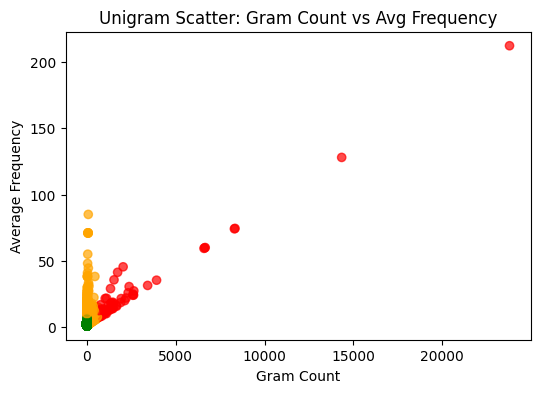

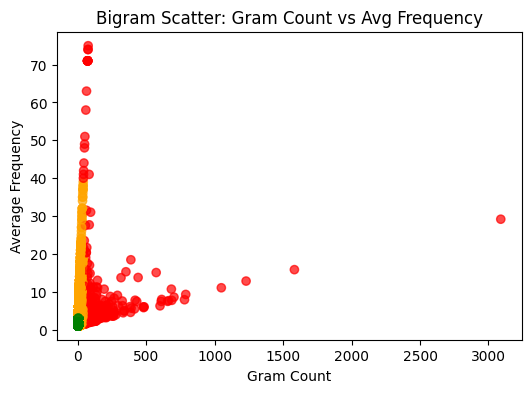

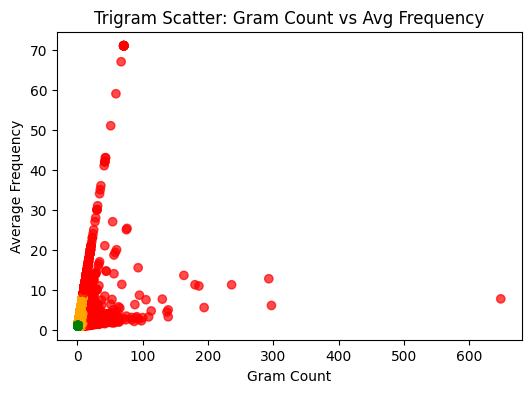

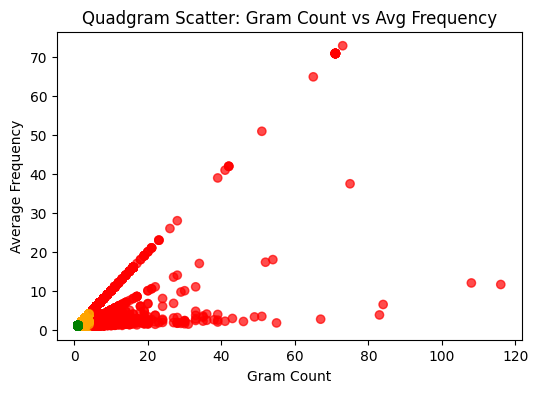

In [ ]:
# ****** VISUALIZATION ******
def plot_outlier_analysis(df, ngram_type="Unigram"):
    plt.figure(figsize=(6,4))
    colors = df['Outlier_strength'].map({'Non-Outlier':'green','Weak Outlier':'orange','Strong Outlier':'red'})
    plt.scatter(df['gram_count'], df['Average_freq'], c=colors, alpha=0.7)
    plt.xlabel("Gram Count")
    plt.ylabel("Average Frequency")
    plt.title(f"{ngram_type} Scatter: Gram Count vs Avg Frequency")
    plt.show()
    
plot_outlier_analysis(unigram_flags, "Unigram") 
plot_outlier_analysis(bigram_flags, "Bigram")
plot_outlier_analysis(trigram_flags, "Trigram")
plot_outlier_analysis(quadgram_flags, "Quadgram")


In [15]:
# ****** SEPARATE STOPWORDS AND IMP ******
def seperate_stopwords_and_imp(df, type="Unigram"):
    stopwords_df = pd.DataFrame(df[
        df['Reason'].isin(["Stopword","Short token","Context stopword","Non-alphabetic token","Noisy token"])
    ])

    outliers_df = pd.DataFrame(df[df['Final_interpretation'] == "Outlier"])

    important_words_df = pd.DataFrame(df[
        (df['Reason'] == "Potentially important") |
        (df['Final_interpretation'] == "Non-Outlier")
    ])

    return stopwords_df, important_words_df, outliers_df

uni_stopwords, uni_imp_words, uni_outliers = seperate_stopwords_and_imp(unigram_flags, "Unigram")
bi_stopwords, bi_imp_words, bi_outliers = seperate_stopwords_and_imp(bigram_flags, "Bigram")
tri_stopwords, tri_imp_words, tri_outliers = seperate_stopwords_and_imp(trigram_flags, "Trigram")
quad_stopwords, quad_imp_words, quad_outliers = seperate_stopwords_and_imp(quadgram_flags, "Quadgram")


In [16]:
# Export stopwords to csv
uni_stopwords.to_csv("unigram_stopwords.csv")
bi_stopwords.to_csv("bigram_stopwords.csv")
tri_stopwords.to_csv("trigram_stopwords.csv")
quad_stopwords.to_csv("quadgram_stopwords.csv");

In [17]:
# Export important words to csv
uni_imp_words.to_csv("unigram_important_words.csv")
bi_imp_words.to_csv("bigram_important_words.csv")
tri_imp_words.to_csv("trigram_important_words.csv")
quad_imp_words.to_csv("quadgram_important_words.csv");

In [18]:
# Export outliers to csv
uni_outliers.to_csv("unigram_outliers.csv")
bi_outliers.to_csv("bigram_outliers.csv")
tri_outliers.to_csv("trigram_outliers.csv")
quad_outliers.to_csv("quadgram_outliers.csv");

In [ ]:
# compute outliers in unigram using z_score on frequency and gram count intersection
mean_1 = uni_gram_df['gram_count'].mean()
std_1 =  uni_gram_df['gram_count'].std()

outliers_1 = [gram from uni_gram_df[]] 

✅ Exported 1827 unigrams to c:\MACHINE LEARNING LAB\words_blacklist.txt
